<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [91]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [92]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-09-11 20:54:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.003s  

2022-09-11 20:54:50 (6.56 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [93]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [94]:
df.shape

(346, 10)

### Convert to date time object


In [95]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [96]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [97]:
# notice: installing seaborn might takes a few minutes
%conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


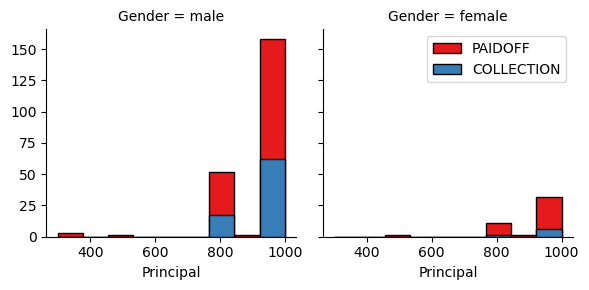

In [98]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

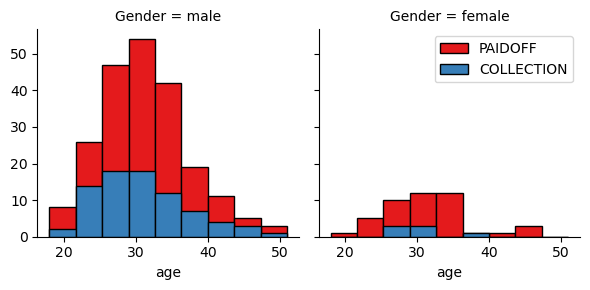

In [99]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


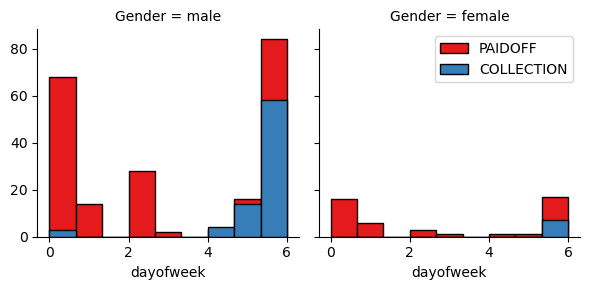

In [100]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [101]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [102]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [103]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [104]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [105]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [106]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [107]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [108]:
y = df['loan_status']
y

0         PAIDOFF
1         PAIDOFF
2         PAIDOFF
3         PAIDOFF
4         PAIDOFF
          ...    
341    COLLECTION
342    COLLECTION
343    COLLECTION
344    COLLECTION
345    COLLECTION
Name: loan_status, Length: 346, dtype: object

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [109]:
x= preprocessing.StandardScaler().fit(X).transform(X)
x

array([[ 0.52,  0.92,  2.33, ..., -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34, ...,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, ..., -0.38, -0.88,  1.15],
       ...,
       [-1.31, -0.96,  1.34, ..., -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49, ..., -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.82, ..., -0.38, -0.88,  1.15]])

In [110]:
y.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)
y

0      1
1      1
2      1
3      1
4      1
      ..
341    0
342    0
343    0
344    0
345    0
Name: loan_status, Length: 346, dtype: int64

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


Shape of train sets:  (276, 8) (276,)
Shape of test sets:  (70, 8) (70,)
[0.74 0.7  0.79 0.73 0.76 0.74 0.8  0.77 0.76]


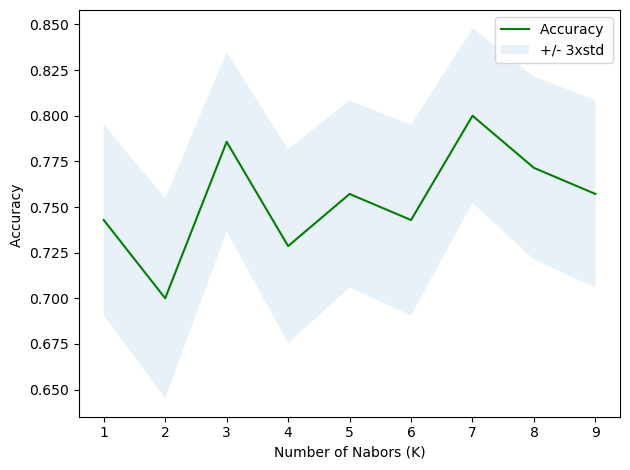

The best accuracy was with 0.8 with k= 7


In [111]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

x_train_Knn1,x_test_Knn1,y_train_Knn1,y_test_Knn1=train_test_split(x,y,test_size=0.2)
print("Shape of train sets: ",x_train_Knn1.shape,y_train_Knn1.shape)
print('Shape of test sets: ',x_test_Knn1.shape,y_test_Knn1.shape)
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))

for n in range(1,Ks):
    neigh1=KNeighborsClassifier(n_neighbors=n).fit(x_train_Knn1,y_train_Knn1)
    y_hatKnn1=neigh1.predict(x_test_Knn1)
    
    mean_acc[n-1]=metrics.accuracy_score(y_test_Knn1,y_hatKnn1)
    std_acc[n-1]=np.std(y_hatKnn1==y_test_Knn1)/np.sqrt(y_hatKnn1.shape[0])
print(mean_acc)
bestK=mean_acc.argmax()+1

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

# result
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1 )




x_train_Knn=x
y_train_Knn=y
neigh=KNeighborsClassifier(n_neighbors=bestK).fit(x_trainKnn,y_trainKnn)

# Decision Tree


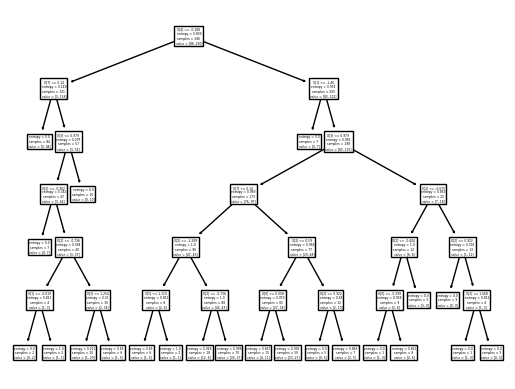

In [112]:


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

loanTree=DecisionTreeClassifier(criterion="entropy",max_depth=6)

x = Feature
x_train_dt= preprocessing.StandardScaler().fit(x).transform(x)

y_train_dt = df['loan_status']
y_train_dt.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

loanTree.fit(x_train_dt,y_train_dt)
tree.plot_tree(loanTree)
plt.show()

# Support Vector Machine


In [113]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

x_train_svm=np.asarray(Feature)

y_train_svm = df['loan_status']

clf = svm.SVC(kernel='rbf')
clf.fit(x_train_svm, y_train_svm) 

SVC()

# Logistic Regression


In [114]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = np.asarray(Feature)
x_train_lr= preprocessing.StandardScaler().fit(X).transform(X)

y_train_lr = df['loan_status']

lr_params=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
LR_accuracy_scores=[]


In [115]:
for params in lr_params:
    LR = LogisticRegression(C=0.01, solver=params).fit(x_train_lr,y_train_lr)
    y_hat_train_lr=LR.predict(x_train_lr)
    LR_accuracy_scores.append(metrics.accuracy_score(y_train_lr,y_hat_train_lr))
    
bestLrScore=max(LR_accuracy_scores)
bestLrParam=lr_params[LR_accuracy_scores.index(max(LR_accuracy_scores))]
print("The highest accuracy is ",bestLrScore,' using ',bestLrParam,'.')

The highest accuracy is  0.7514450867052023  using  newton-cg .


In [116]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train_lr,y_train_lr)

# Model Evaluation using Test set


In [117]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [118]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-09-11 20:55:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-09-11 20:55:03 (824 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [119]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [120]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = df['effective_date'].dt.dayofweek
test_df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
test_df[['Principal','terms','age','Gender','education']]

Label = test_df[['Principal','terms','age','Gender','weekend']]
Label= pd.concat([Label,pd.get_dummies(test_df['education'])], axis=1)
Label.drop(['Master or Above'], axis = 1,inplace=True)

Label.head(5)

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


### KNN Evaluation

In [121]:

x_test_knn=Label
x_test_knn=preprocessing.StandardScaler().fit(x_test_knn).transform(x_test_knn)

y_test_knn=test_df['loan_status']
y_test_knn.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

y_hat_knn=neigh.predict(x_test_knn)

jaccard_scoreKnn=jaccard_score(y_test_knn,y_hat_knn)
f1_scoreKnn=f1_score(y_test_knn,y_hat_knn)

print(f1_scoreKnn)
print(jaccard_scoreKnn)

0.7906976744186046
0.6538461538461539


### Decision Tree Evaluation

In [122]:
x_test_dt=Label
x_test_dt=preprocessing.StandardScaler().fit(x_test_dt).transform(x_test_dt)

y_test_dt=test_df['loan_status']
y_test_dt.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

y_hat_dt=loanTree.predict(x_test_dt)

jaccard_scoreDt=jaccard_score(y_test_dt,y_hat_dt)
f1_scoreDt=f1_score(y_test_dt,y_hat_dt)
print(y_test_dt.shape,y_hat_dt.shape)
print(f1_scoreDt,jaccard_scoreDt)

(54,) (54,)
0.7999999999999998 0.6666666666666666


### SVM Evalution

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        40

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion matrix, without normalization
[[ 0 14]
 [ 0 40]]


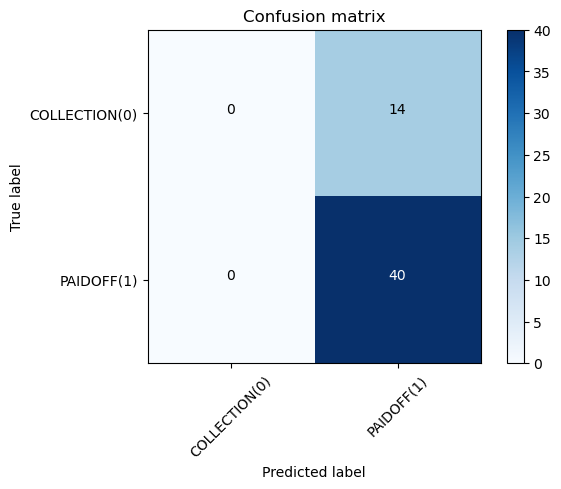

In [123]:
x_test_svm=Label
x_test_svm=preprocessing.StandardScaler().fit(x_test_svm).transform(x_test_svm)


y_test_svm=test_df['loan_status']
y_test_svm.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

y_hat_svm=clf.predict(x_test_svm)

y_hat_svm
#Confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_svm, y_hat_svm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test_svm, y_test_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION(0)','PAIDOFF(1)'],normalize= False,  title='Confusion matrix')

In [124]:


f1_scoreSvm=f1_score(y_test_svm, y_hat_svm)
jaccard_scoreSvm=jaccard_score(y_test_svm, y_hat_svm)

print(f1_scoreSvm)
print(jaccard_scoreSvm)

0.851063829787234
0.7407407407407407


### Logistic Regression Evaluation

[[ 0 14]
 [ 0 40]]
Confusion matrix, without normalization
[[ 0 14]
 [ 0 40]]


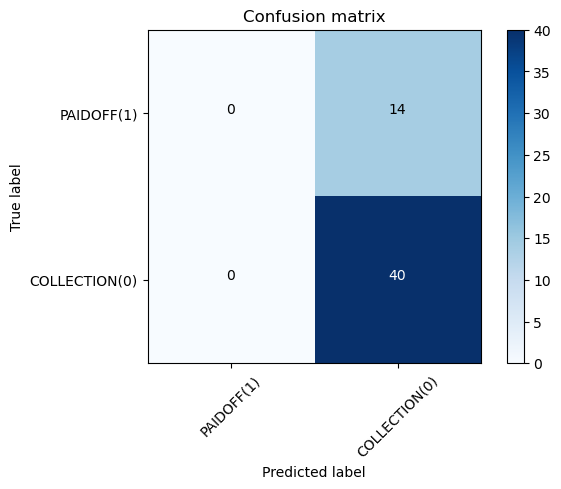

In [125]:
x_test_lr=np.asarray(Label)
x_test_lr = preprocessing.StandardScaler().fit(x_test_lr).transform(x_test_lr)

y_test_lr=test_df['loan_status']
y_test_lr.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

y_hat_lr=LR.predict(x_test_lr)
y_hat_lr
#Confusion matrix for Logistic Regression

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test_lr, y_hat_lr, labels=[0,1]))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_lr, y_hat_lr, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(0)'],normalize= False,  title='Confusion matrix')

In [126]:
f1_scoreLr=f1_score(y_test_lr, y_hat_lr)
jaccard_scoreLr=jaccard_score(y_test_lr, y_hat_lr)
log_lossLr=log_loss(y_test_lr,y_hat_lr)

print(f1_scoreLr)
print(jaccard_scoreLr)
print(log_lossLr)

0.851063829787234
0.7407407407407407
8.95470488690319


### Summary

In [127]:
dictReport={
    "Algorithm":["KNN","Decision Tree","SVM","Logistic Regression"],
    "Jaccard":[jaccard_scoreKnn,jaccard_scoreDt,jaccard_scoreSvm,jaccard_scoreLr],
    "F1-Score":[f1_scoreKnn,f1_scoreDt,f1_scoreSvm,f1_scoreLr],
    "Log Loss":["NA","NA","NA",log_lossLr]
}

report=pd.DataFrame(dictReport)
report

,Algorithm,Jaccard,F1-Score,Log Loss
0,KNN,0.653846,0.790698,NA
1,Decision Tree,0.666667,0.800000,NA
2,SVM,0.740741,0.851064,NA
3,Logistic Regression,0.740741,0.851064,8.954705


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
